In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import scipy.ndimage as ndimage
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import matplotlib.mlab as mlab
from matplotlib import cm
from scipy.interpolate import interp1d

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.linewidth'] = 2

mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'

plt.rc('text', usetex=True) ## this line is necessary to use the correct fonts 
plt.rc('font', family='serif') # this line is necessary to use the correct font


# This function makes the plots pretty 
def plot_prop(f1,ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left') 
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['left'].set_position(('axes', -0.01))
    ax.spines['bottom'].set_position(('axes', -0.02))
    ax.xaxis.set_minor_locator(AutoMinorLocator(1))
    ax.yaxis.set_minor_locator(AutoMinorLocator(1))

    # x and y tickers
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%g'))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
    plt.tick_params(direction='out',which='major', length=8,width=1.5,colors='k',labelsize=f1)
    plt.tick_params(direction='out',which='minor',length=4,width=1, color='k')
    return;


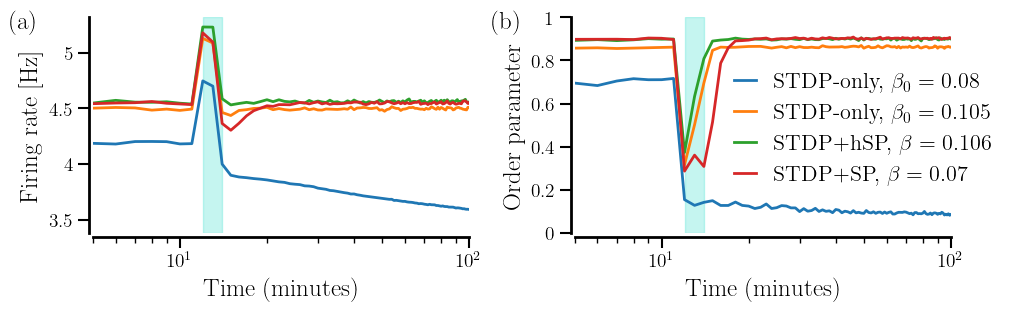

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

cmp = 'bwr'#'jet'#'Spectral_r'
lw = 2 
s = 140
l1=1; f1=14; f2=16; f3=18  # the font sizes 
fig = plt.figure(constrained_layout=True)
fig.set_size_inches(10,3)  # the size of the plot in inches 
gs = gridspec.GridSpec(1, 2, figure=fig)  # the gridspace, here I set 2 * 1

rtime = 12 # in minutes
stime = 2 # in minutes

Randata1 = np.loadtxt('Data/Data_Fig22/STDP(a=1.4,Wmean=0.8,k=8,beta=0.080,RR,Astim=0.221,Fs=51.0)Random.dat')
Randata2 = np.loadtxt('Data/Data_Fig22/STDP(a=1.4,Wmean=0.8,k=8,beta=0.105,RR,Astim=0.221,Fs=51.0)Random.dat')
SPdata = np.loadtxt('Data/Data_Fig22/STDP(a=1.4,Wmean=0.8,k=8,beta=0.070,RR,Astim=0.221,Fs=51.0).dat')
SPdataPw0 = np.loadtxt('Data/Data_Fig22/STDP(a=1.4,Wmean=0.8,k=8,beta=0.100,RR,Astim=0.221,Fs=51.0)Pw0.dat')

t1 = np.arange(0,len(Randata1))
t2 = np.arange(0,len(Randata2))
t3 = np.arange(0,len(SPdata))
t4 = np.arange(0,len(SPdataPw0))

ax = pl.subplot(gs[0])
plot_prop(f1,ax)
plt.plot(t1,Randata1[:,1],label=r'STDP-only, $\beta_0=0.08$',lw=lw)
plt.plot(t2,Randata2[:,1],label=r'STDP-only, $\beta_0=0.105$',lw=lw)
plt.plot(t4,SPdataPw0[:,1],label=r'STDP+hSP, $\beta=0.106$',lw=lw)
plt.plot(t3,SPdata[:,1],label=r'STDP+SP, $\beta=0.07$',lw=lw)
plt.axvspan(rtime, rtime+stime, ymin=0., ymax=1, alpha=0.3, color='turquoise')
plt.ylabel('Firing rate [Hz]',fontsize=f3)
plt.xlabel('Time (minutes)',fontsize=f3)
# plt.legend(frameon=False,fontsize=f2,loc=(1,0.25))
plt.xlim(5,100)
plt.xscale('log')
plt.text(-0.22,0.95,'(a)',fontsize=f3,transform=ax.transAxes)

ax = pl.subplot(gs[1])
plot_prop(f1,ax)
plt.plot(t1,Randata1[:,0],label=r'STDP-only, $\beta_0=0.08$',lw=lw)
plt.plot(t2,Randata2[:,0],label=r'STDP-only, $\beta_0=0.105$',lw=lw)
plt.plot(t4,SPdataPw0[:,0],label=r'STDP+hSP, $\beta=0.106$',lw=lw)
plt.plot(t3,SPdata[:,0],label=r'STDP+SP, $\beta=0.07$',lw=lw)
plt.axvspan(rtime, rtime+stime, ymin=0., ymax=1, alpha=0.3, color='turquoise')
plt.ylabel('Order parameter',fontsize=f3)
plt.xlabel('Time (minutes)',fontsize=f3)
plt.ylim(0,1)
plt.xlim(5,100)
plt.xscale('log')
plt.text(-0.22,0.95,'(b)',fontsize=f3,transform=ax.transAxes)
plt.legend(frameon=False,fontsize=f2,loc=(0.4,0.18),handlelength=1)

# plt.savefig('stim_example.jpg',dpi=600)
plt.show()